# Analysis of Head-to-Head LDC Fitness Competitions
#### March 8, 2019
### This notebook contains the analysis of the raw data Belinda obtained during her time in the lab as a McNair Scholar in 2018.  Single mutant knock out strains were in Synechococcus 7942 and performed classic head-to head fitness competition experiments

Prior to the analysis the data was prepared in a cvs file for analysis here. Lets begin by loading the needed anlyitical and graphing libraries followed by the data we will use that was collected.

### Load packages and data

In [1]:
# Importing intrinsic libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [2]:
# Loading Pandas DataFrame:
data1 = pd.read_csv("../Datasets/initial-mutant-wt.csv")
data1.head(5)

,strain,day,condition,percent-mutant
0,_0863,day 0,LDC,0.56
1,_0863,day 0,LDC,0.50
2,_0863,day 0,LDC,0.42
3,_0863,day 0,LDC,0.46
4,_0863,day 2,LDC,0.65


In [3]:
# Lets subset the data into our CLC and LDC results
data1_ldc = data1[data1.condition == "LDC"]
data1_clc = data1[data1.condition == "CLC"]

# Lets first look at the data from LDC conditions: 
### Make a box plot
We will plot the individual replicate data points and group the timepoints together for each strain.
First start the the data from competitions flasks incubated in 12-12 LDC (~150 uE)

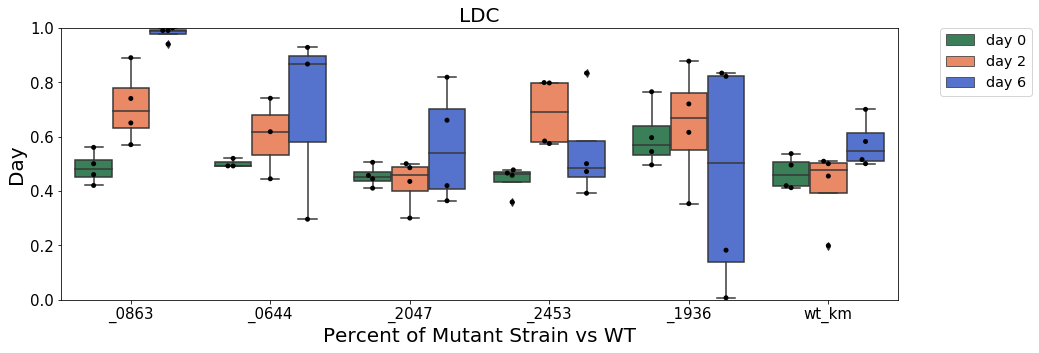

In [9]:
# Set order you want to plot
plt.figure(figsize=(15,5))

x = "strain"
y = "percent-mutant"
order=["day 0", "day 2", "day 6"]

swarmplot1ldc = sns.swarmplot(data=data1_ldc, x=x, y=y, hue = "day", dodge=True, 
               palette=sns.color_palette(['black', 'black', 'black']), hue_order=order)

boxplot1ldc = sns.boxplot(data=data1_ldc, x=x, y=y, hue="day", hue_order=order,
                       palette=sns.color_palette(['seagreen', 'coral', 'royalblue']))

# control x and y limits
boxplot1ldc.set(ylim=(0, 1))
swarmplot1ldc.set(ylim=(0, 1))

# control axis labels
boxplot1ldc.axes.set_title("LDC",fontsize=20)
boxplot1ldc.set_xlabel("Percent of Mutant Strain vs WT",fontsize=20)
boxplot1ldc.set_ylabel("Day",fontsize=20)
boxplot1ldc.tick_params(labelsize=15)


plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# Fix the legand
# Get the handles and labels. 
handles, labels = boxplot1ldc.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')


### Okay, lets run stats on this to see if there is any signifigance

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0863_day 0 v.s. _0863_day 2: t-test independent samples, P_val=2.278e-02 stat=-3.041e+00
_0863_day 2 v.s. _0863_day 6: t-test independent samples, P_val=8.705e-03 stat=-3.825e+00
_0863_day 0 v.s. _0863_day 6: t-test independent samples, P_val=5.324e-06 stat=-1.510e+01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0644_day 0 v.s. _0644_day 2: t-test independent samples, P_val=3.124e-01 stat=-1.155e+00
_0644_day 2 v.s. _0644_day 6: t-test independent samples, P_val=6.841e-01 stat=-4.378e-01
_0644_day 0 v.s. _0644_day 6: t-test independent samples, P_val=3.865e-01 stat=-9.710e-01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1

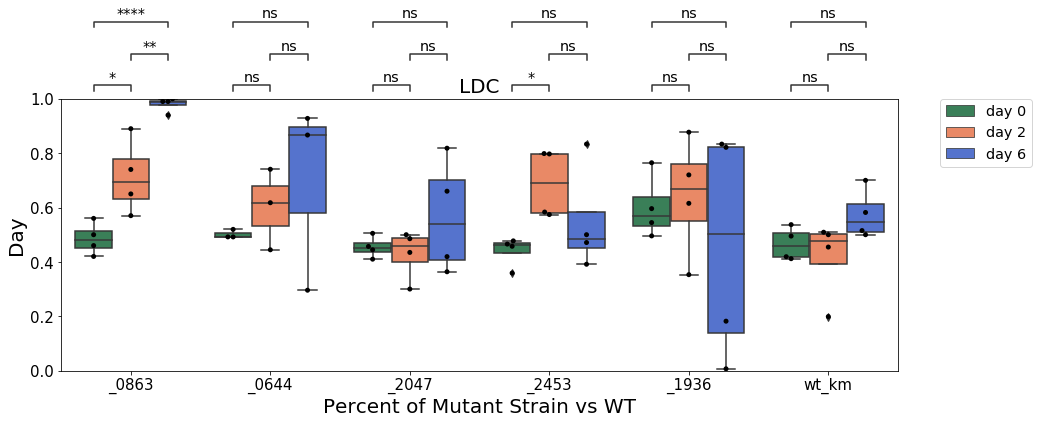

In [10]:
# Set order you want to plot
plt.figure(figsize=(15,5))

x = "strain"
y = "percent-mutant"
order=["day 0", "day 2", "day 6"]

swarmplot1ldc = sns.swarmplot(data=data1_ldc, x=x, y=y, hue = "day", dodge=True, 
               palette=sns.color_palette(['black', 'black', 'black']), hue_order=order)

boxplot1ldc = sns.boxplot(data=data1_ldc, x=x, y=y, hue="day", hue_order=order,
                       palette=sns.color_palette(['seagreen', 'coral', 'royalblue']))

# control x and y limits
boxplot1ldc.set(ylim=(0, 1))
swarmplot1ldc.set(ylim=(0, 1))

# control axis labels
boxplot1ldc.axes.set_title("LDC",fontsize=20)
boxplot1ldc.set_xlabel("Percent of Mutant Strain vs WT",fontsize=20)
boxplot1ldc.set_ylabel("Day",fontsize=20)
boxplot1ldc.tick_params(labelsize=15)

stat_0863 = add_stat_annotation(boxplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_0863", "day 0"), ("_0863", "day 2")),
                                 (("_0863", "day 2"), ("_0863", "day 6")),
                                 (("_0863", "day 0"), ("_0863", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_0644 = add_stat_annotation(boxplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_0644", "day 0"), ("_0644", "day 2")),
                                 (("_0644", "day 2"), ("_0644", "day 6")),
                                 (("_0644", "day 0"), ("_0644", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_1936 = add_stat_annotation(boxplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_1936", "day 0"), ("_1936", "day 2")),
                                 (("_1936", "day 2"), ("_1936", "day 6")),
                                 (("_1936", "day 0"), ("_1936", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2047 = add_stat_annotation(boxplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_2047", "day 0"), ("_2047", "day 2")),
                                 (("_2047", "day 2"), ("_2047", "day 6")),
                                 (("_2047", "day 0"), ("_2047", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2453 = add_stat_annotation(boxplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_2453", "day 0"), ("_2453", "day 2")),
                                 (("_2453", "day 2"), ("_2453", "day 6")),
                                 (("_2453", "day 0"), ("_2453", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_wt = add_stat_annotation(boxplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("wt_km", "day 0"), ("wt_km", "day 2")),
                                 (("wt_km", "day 2"), ("wt_km", "day 6")),
                                 (("wt_km", "day 0"), ("wt_km", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# Fix the legand
# Get the handles and labels. 
handles, labels = boxplot1ldc.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')


This looks okay, but I think I'd prefer a bar plot

### Make it a bar plot

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0863_day 0 v.s. _0863_day 2: t-test independent samples, P_val=2.278e-02 stat=-3.041e+00
_0863_day 2 v.s. _0863_day 6: t-test independent samples, P_val=8.705e-03 stat=-3.825e+00
_0863_day 0 v.s. _0863_day 6: t-test independent samples, P_val=5.324e-06 stat=-1.510e+01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0644_day 0 v.s. _0644_day 2: t-test independent samples, P_val=3.124e-01 stat=-1.155e+00
_0644_day 2 v.s. _0644_day 6: t-test independent samples, P_val=6.841e-01 stat=-4.378e-01
_0644_day 0 v.s. _0644_day 6: t-test independent samples, P_val=3.865e-01 stat=-9.710e-01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1

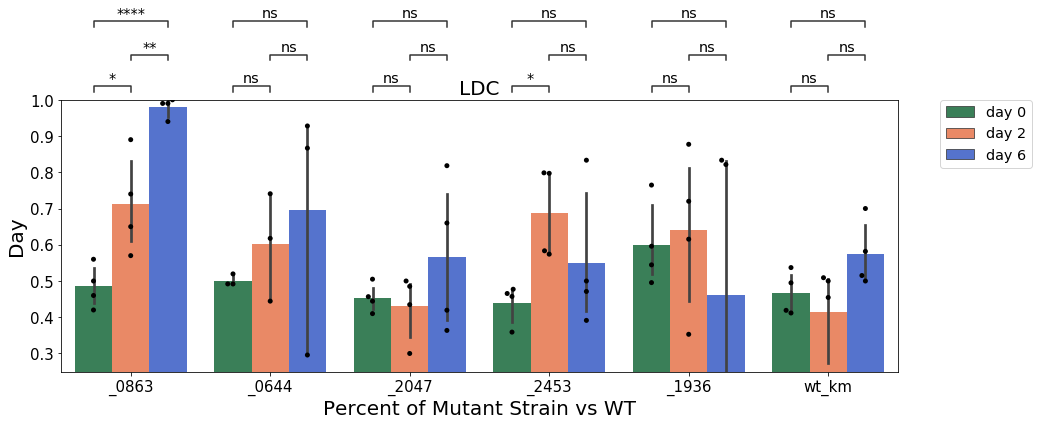

In [11]:
# Set order you want to plot
plt.figure(figsize=(15,5))

x = "strain"
y = "percent-mutant"
order=["day 0", "day 2", "day 6"]

swarmplot1ldc = sns.swarmplot(data=data1_ldc, x=x, y=y, hue = "day", dodge=True, 
               palette=sns.color_palette(['black', 'black', 'black']), hue_order=order)

barplot1ldc = sns.barplot(data=data1_ldc, x=x, y=y, hue="day", hue_order=order,
                       palette=sns.color_palette(['seagreen', 'coral', 'royalblue']))

# control x and y limits
barplot1ldc.set(ylim=(0.25, 1))
swarmplot1ldc.set(ylim=(0.25, 1))

# control axis labels
barplot1ldc.axes.set_title("LDC",fontsize=20)
barplot1ldc.set_xlabel("Percent of Mutant Strain vs WT",fontsize=20)
barplot1ldc.set_ylabel("Day",fontsize=20)
barplot1ldc.tick_params(labelsize=15)

stat_0863 = add_stat_annotation(barplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_0863", "day 0"), ("_0863", "day 2")),
                                 (("_0863", "day 2"), ("_0863", "day 6")),
                                 (("_0863", "day 0"), ("_0863", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_0644 = add_stat_annotation(barplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_0644", "day 0"), ("_0644", "day 2")),
                                 (("_0644", "day 2"), ("_0644", "day 6")),
                                 (("_0644", "day 0"), ("_0644", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_1936 = add_stat_annotation(barplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_1936", "day 0"), ("_1936", "day 2")),
                                 (("_1936", "day 2"), ("_1936", "day 6")),
                                 (("_1936", "day 0"), ("_1936", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2047 = add_stat_annotation(barplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_2047", "day 0"), ("_2047", "day 2")),
                                 (("_2047", "day 2"), ("_2047", "day 6")),
                                 (("_2047", "day 0"), ("_2047", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2453 = add_stat_annotation(barplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("_2453", "day 0"), ("_2453", "day 2")),
                                 (("_2453", "day 2"), ("_2453", "day 6")),
                                 (("_2453", "day 0"), ("_2453", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_wt = add_stat_annotation(barplot1ldc, data=data1_ldc, x=x, y=y, hue="day",
                    boxPairList=[(("wt_km", "day 0"), ("wt_km", "day 2")),
                                 (("wt_km", "day 2"), ("wt_km", "day 6")),
                                 (("wt_km", "day 0"), ("wt_km", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# Fix the legand
# Get the handles and labels. 
handles, labels = boxplot1ldc.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')


### Better. From this, we can conclude that *synpcc7942_0863* has the strongest and most signifigant increase in fitness under LDC conditions. Lets, now look at the CLC control condition.

# CLC Conditions

### Box plot

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0863_day 0 v.s. _0863_day 2: t-test independent samples, P_val=8.920e-02 stat=-2.026e+00
_0863_day 2 v.s. _0863_day 6: t-test independent samples, P_val=1.227e-01 stat=1.796e+00
_0863_day 0 v.s. _0863_day 6: t-test independent samples, P_val=7.243e-01 stat=3.698e-01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0644_day 0 v.s. _0644_day 2: t-test independent samples, P_val=2.523e-01 stat=-1.337e+00
_0644_day 2 v.s. _0644_day 6: t-test independent samples, P_val=7.176e-02 stat=-2.433e+00
_0644_day 0 v.s. _0644_day 6: t-test independent samples, P_val=1.551e-03 stat=-7.673e+00
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.0

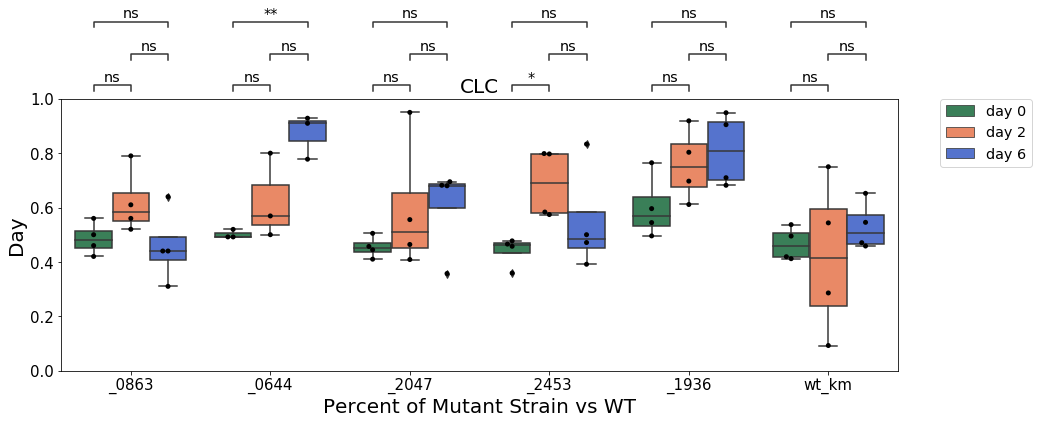

In [12]:
# Set order you want to plot
plt.figure(figsize=(15,5))

x = "strain"
y = "percent-mutant"
order=["day 0", "day 2", "day 6"]

swarmplot1clc = sns.swarmplot(data=data1_clc, x=x, y=y, hue = "day", dodge=True, 
               palette=sns.color_palette(['black', 'black', 'black']), hue_order=order)

boxplot1clc = sns.boxplot(data=data1_clc, x=x, y=y, hue="day", hue_order=order,
                       palette=sns.color_palette(['seagreen', 'coral', 'royalblue']))

# control x and y limits
boxplot1clc.set(ylim=(0, 1))
swarmplot1clc.set(ylim=(0, 1))

# control axis labels
boxplot1clc.axes.set_title("CLC",fontsize=20)
boxplot1clc.set_xlabel("Percent of Mutant Strain vs WT",fontsize=20)
boxplot1clc.set_ylabel("Day",fontsize=20)
boxplot1clc.tick_params(labelsize=15)

stat_0863 = add_stat_annotation(boxplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_0863", "day 0"), ("_0863", "day 2")),
                                 (("_0863", "day 2"), ("_0863", "day 6")),
                                 (("_0863", "day 0"), ("_0863", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_0644 = add_stat_annotation(boxplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_0644", "day 0"), ("_0644", "day 2")),
                                 (("_0644", "day 2"), ("_0644", "day 6")),
                                 (("_0644", "day 0"), ("_0644", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_1936 = add_stat_annotation(boxplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_1936", "day 0"), ("_1936", "day 2")),
                                 (("_1936", "day 2"), ("_1936", "day 6")),
                                 (("_1936", "day 0"), ("_1936", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2047 = add_stat_annotation(boxplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_2047", "day 0"), ("_2047", "day 2")),
                                 (("_2047", "day 2"), ("_2047", "day 6")),
                                 (("_2047", "day 0"), ("_2047", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2453 = add_stat_annotation(boxplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_2453", "day 0"), ("_2453", "day 2")),
                                 (("_2453", "day 2"), ("_2453", "day 6")),
                                 (("_2453", "day 0"), ("_2453", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_wt = add_stat_annotation(boxplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("wt_km", "day 0"), ("wt_km", "day 2")),
                                 (("wt_km", "day 2"), ("wt_km", "day 6")),
                                 (("wt_km", "day 0"), ("wt_km", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# Fix the legand
# Get the handles and labels. 
handles, labels = boxplot1clc.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')


Again, this looks okay, but I think I'd prefer a bar plot

### Make it a bar plot

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0863_day 0 v.s. _0863_day 2: t-test independent samples, P_val=8.920e-02 stat=-2.026e+00
_0863_day 2 v.s. _0863_day 6: t-test independent samples, P_val=1.227e-01 stat=1.796e+00
_0863_day 0 v.s. _0863_day 6: t-test independent samples, P_val=7.243e-01 stat=3.698e-01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0644_day 0 v.s. _0644_day 2: t-test independent samples, P_val=2.523e-01 stat=-1.337e+00
_0644_day 2 v.s. _0644_day 6: t-test independent samples, P_val=7.176e-02 stat=-2.433e+00
_0644_day 0 v.s. _0644_day 6: t-test independent samples, P_val=1.551e-03 stat=-7.673e+00
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.0

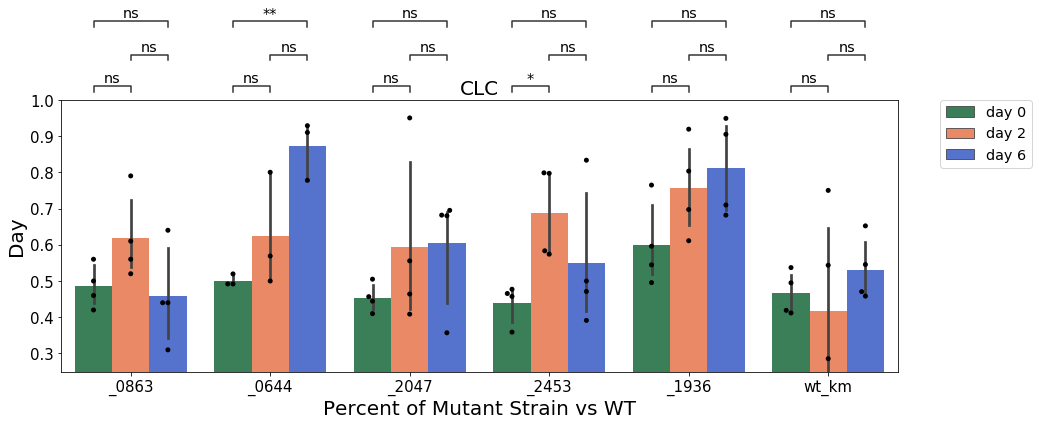

In [13]:
# Set order you want to plot
plt.figure(figsize=(15,5))

x = "strain"
y = "percent-mutant"
order=["day 0", "day 2", "day 6"]

swarmplot1clc = sns.swarmplot(data=data1_clc, x=x, y=y, hue = "day", dodge=True, 
               palette=sns.color_palette(['black', 'black', 'black']), hue_order=order)

barplot1clc = sns.barplot(data=data1_clc, x=x, y=y, hue="day", hue_order=order,
                       palette=sns.color_palette(['seagreen', 'coral', 'royalblue']))

# control x and y limits
barplot1clc.set(ylim=(0.25, 1))
swarmplot1clc.set(ylim=(0.25, 1))

# control axis labels
barplot1clc.axes.set_title("CLC",fontsize=20)
barplot1clc.set_xlabel("Percent of Mutant Strain vs WT",fontsize=20)
barplot1clc.set_ylabel("Day",fontsize=20)
barplot1clc.tick_params(labelsize=15)

stat_0863 = add_stat_annotation(barplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_0863", "day 0"), ("_0863", "day 2")),
                                 (("_0863", "day 2"), ("_0863", "day 6")),
                                 (("_0863", "day 0"), ("_0863", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_0644 = add_stat_annotation(barplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_0644", "day 0"), ("_0644", "day 2")),
                                 (("_0644", "day 2"), ("_0644", "day 6")),
                                 (("_0644", "day 0"), ("_0644", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_1936 = add_stat_annotation(barplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_1936", "day 0"), ("_1936", "day 2")),
                                 (("_1936", "day 2"), ("_1936", "day 6")),
                                 (("_1936", "day 0"), ("_1936", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2047 = add_stat_annotation(barplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_2047", "day 0"), ("_2047", "day 2")),
                                 (("_2047", "day 2"), ("_2047", "day 6")),
                                 (("_2047", "day 0"), ("_2047", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_2453 = add_stat_annotation(barplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("_2453", "day 0"), ("_2453", "day 2")),
                                 (("_2453", "day 2"), ("_2453", "day 6")),
                                 (("_2453", "day 0"), ("_2453", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_wt = add_stat_annotation(barplot1clc, data=data1_clc, x=x, y=y, hue="day",
                    boxPairList=[(("wt_km", "day 0"), ("wt_km", "day 2")),
                                 (("wt_km", "day 2"), ("wt_km", "day 6")),
                                 (("wt_km", "day 0"), ("wt_km", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# Fix the legand
# Get the handles and labels. 
handles, labels = boxplot1clc.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')


With this preliminary results, we then asked the question, would a strain that has a higher fitness score outcoompete another LDC thriver that has a slightly lower fitness score?

## Click here to continue to <a href="02-Initial-non-wt.ipynb"> "Next analysis for mutant vs mutant (non WT) competitions" </a>

### Or if you want to print the figures:

In [12]:
barplot1ldc = barplot1ldc.get_figure()
barplot1clc = barplot1clc.get_figure()

barplot1ldc.savefig('Figures/barplot1ldc.png', dpi=400, bbox_inches="tight")
barplot1clc.savefig('Figures/barplot1clc.png', dpi=400, bbox_inches="tight")